In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from Codigo import *





In [14]:
Datos = Tachos('../Alemania_Reducida.csv')
data = Datos[['PIB (US$ a precios constantes de 2010)','Gasto de consumo final de los hogares (US$ a precios constantes de 2010)','Gasto nacional bruto (US$ a precios constantes de 2010)']].dropna(axis = 0)
data.columns = ['PIB','Inversión','Gasto']
data.dropna(axis =1, inplace= True)


In [36]:

# Paso 3: Pruebas de Cointegración
cointegration_test = coint_johansen(data, det_order=1, k_ar_diff=0)
print("Cointegration Test:")
print(cointegration_test.cvt)
print(cointegration_test.cvm)
print("Eigenvalues:")
print(cointegration_test.lr1)
print("Trace statistic:")
print(cointegration_test.lr2)

Cointegration Test:
[[32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]
[[21.8731 24.2522 29.2631]
 [15.0006 17.1481 21.7465]
 [ 2.7055  3.8415  6.6349]]
Eigenvalues:
[31.99806444 13.49795689  1.98873642]
Trace statistic:
[18.50010755 11.50922048  1.98873642]


In [16]:
# Seleccionamos el número de vectores propios (eigenvectors) para la cointegración
num_eigenvectors = np.sum(cointegration_test.lr1 > cointegration_test.cvt[:, 0])
print(num_eigenvectors)


0


In [39]:
vecm_model = VECM(data, k_ar_diff=0, coint_rank=2)
vecm_result = vecm_model.fit()

# Paso 5: Diagnóstico del Modelo
print("\nModel Summary:")
print(vecm_result.summary())


Model Summary:
                Loading coefficients (alpha) for equation PIB                 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ec1           -0.1622      0.039     -4.183      0.000      -0.238      -0.086
ec2            0.2922      0.244      1.200      0.230      -0.185       0.770
             Loading coefficients (alpha) for equation Inversión              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ec1           -0.1006      0.019     -5.289      0.000      -0.138      -0.063
ec2           -0.0921      0.119     -0.771      0.440      -0.326       0.142
               Loading coefficients (alpha) for equation Gasto                
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


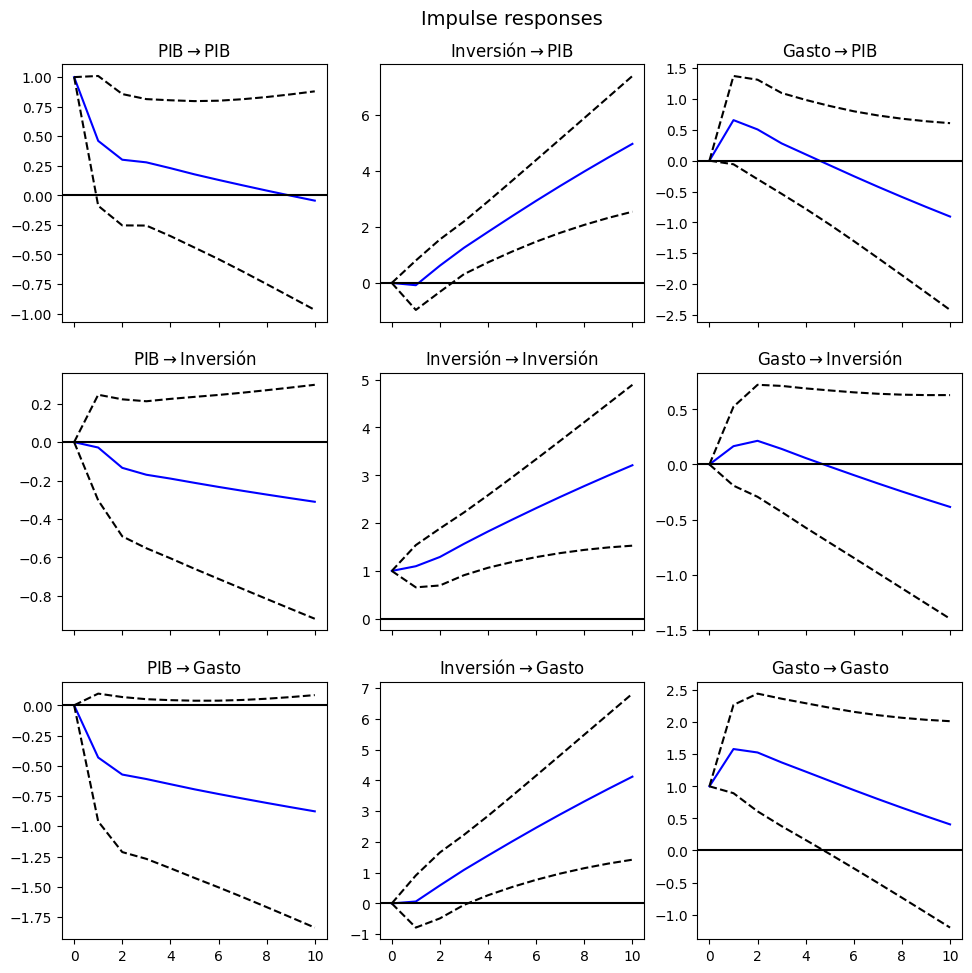

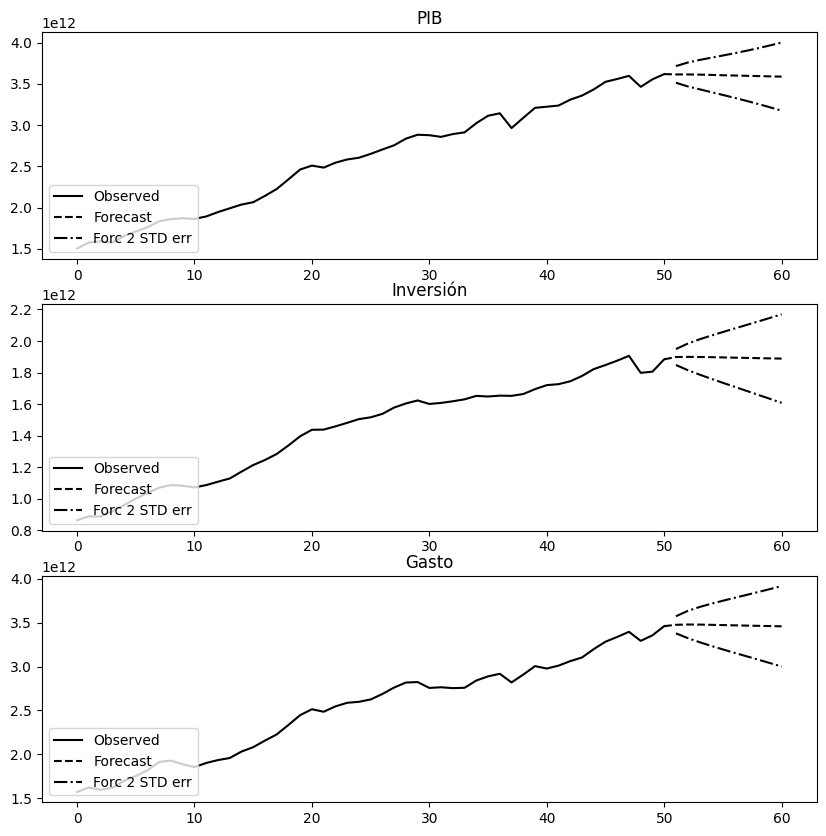

In [20]:


# Paso 6: Análisis de Impulsos-Respuestas
irf = vecm_result.irf(periods=10)
irf.plot()
plt.show()

# Paso 7: Predicciones
forecast_steps = 10
forecast = vecm_result.plot_forecast(steps=forecast_steps)



In [21]:
# Paso 8: Evaluación del Modelo
rmse_value = rmse(data.iloc[1:], forecast)
print("\nRoot Mean Squared Error (RMSE):", rmse_value)

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

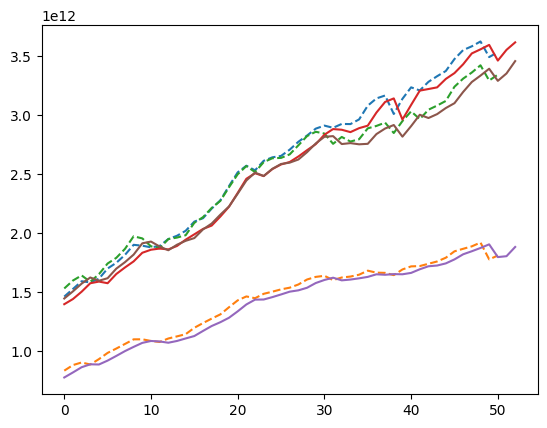

In [27]:
plt.plot(vecm_result.fittedvalues, linestyle = "--")
plt.plot(data.values)